GUI

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('1.csv')

In [7]:
import os
import pandas as pd
import tkinter as tk
from tkinter import ttk

In [8]:
def create_label_entry(parent, label_text):
    label = ttk.Label(parent, text=label_text)
    label.pack()
    entry = ttk.Entry(parent)
    entry.pack()
    return entry

In [9]:
def create_checkbutton(parent, label_text, var):
    check = ttk.Checkbutton(parent, text=label_text, variable=var)
    check.pack()
    return check

In [ ]:
root = tk.Tk()
root.title("Behavioral Patterns Analysis for Disease Prediction in Psychology")

age_options = ["18-25", "26-35", "36-45", "46-55", "56-65", "Above 65"]
gender_options = ["Male", "Female", "Non-Binary", "Prefer Not to Say"]
depression_options = ["Not at all", "Mild", "Moderate", "Severe"]
tiredness_options = ["Never", "Sometimes", "Often", "Always"]
income_options = ["<20,000", "20,000-50,000", "50,000-100,000", "100,000-200,000", ">200,000"]
region_options = ["North America", "Europe", "Asia", "South America", "Africa", "Australia"]
frequency_options = ["Never", "Rarely", "Sometimes", "Often", "Always"]

def create_combobox(parent, label_text, options):
    label = ttk.Label(parent, text=label_text)
    label.pack()
    combobox = ttk.Combobox(parent, values=options, state='readonly')  # Set state to 'readonly'
    combobox.current(0)  # Set the default selection to the first item
    combobox.pack()
    return combobox

age_combobox = create_combobox(root, "Age:", age_options)

gender_combobox = create_combobox(root, "Gender:", gender_options)

depression_combobox = create_combobox(root, "Depression:", depression_options)

tiredness_combobox = create_combobox(root, "Tiredness:", tiredness_options)

income_combobox = create_combobox(root, "Household Income:", income_options)

region_combobox = create_combobox(root, "Region:", region_options)

behavior_combobox = create_combobox(root, "Compulsive Behavior:", frequency_options)

attacks_combobox = create_combobox(root, "Panic attacks:", frequency_options)

swings_combobox = create_combobox(root, "Mood swings:", frequency_options)

thinking_combobox = create_combobox(root, "Obsessive thinking:", frequency_options)

concentration_combobox = create_combobox(root, "Lack of concentration:", frequency_options)

employed_var = tk.BooleanVar()
employed_check = create_checkbutton(root, "I am currently employed at least part-time:", employed_var)

mental_var = tk.BooleanVar()
mental_check = create_checkbutton(root, "I identify as having a mental illness:", mental_var)

phone_var = tk.BooleanVar()
phone_check = create_checkbutton(root, "I have my own computer separate from a smart phone:", phone_var)

hospitalized_var = tk.BooleanVar()
hospitalized_check = create_checkbutton(root, "I have been hospitalized before for my mental illness:", hospitalized_var)

disabled_var = tk.BooleanVar()
disabled_check = create_checkbutton(root, "I am legally disabled:", disabled_var)

internet_var = tk.BooleanVar()
internet_check = create_checkbutton(root, "I have my regular access to the internet:", internet_var)

live_w_parents_var = tk.BooleanVar()
live_w_parents_check = create_checkbutton(root, "I live with my parents:", live_w_parents_var)

resume_gap_var = tk.BooleanVar()
resume_gap_check = create_checkbutton(root, "I have a gap in my resume:", resume_gap_var)

unemployed_var = tk.BooleanVar()
unemployed_check = create_checkbutton(root, "I am unemployed:", unemployed_var)

read_outside_var = tk.BooleanVar()
read_outside_check = create_checkbutton(root, "I read outside of work and school:", read_outside_var)

food_stamps_var = tk.BooleanVar()
food_stamps_check = create_checkbutton(root, "I receive food stamps:", food_stamps_var)

section_8_housing_var = tk.BooleanVar()
section_8_housing_check = create_checkbutton(root, "I am on section 8 housing:", section_8_housing_var)

nlp_entry = create_label_entry(root, "Can you describe why you applied for this test with a few sentences:")

def submit_data():
    data = {
        "Age": age_combobox.get(),
        "Gender": gender_combobox.get(),
        "Depression": depression_combobox.get(),
        "Tiredness": tiredness_combobox.get(),
        "Household Income": income_combobox.get(),
        "Region": region_combobox.get(),
        "Compulsive Behavior": behavior_combobox.get(),
        "Panic Attacks": attacks_combobox.get(),
        "Mood Swings": swings_combobox.get(),
        "Obsessive Thinking": thinking_combobox.get(),
        "Lack of Concentration": concentration_combobox.get(),
        "Can you describe why you applied for this test with a few sentences": nlp_entry.get(),
        "Employed Part-Time": employed_var.get(),
        "Identify Mental Illness": mental_var.get(),
        "Own Computer": phone_var.get(),
        "Hospitalized Before": hospitalized_var.get(),
        "Legally Disabled": disabled_var.get(),
        "Access to Internet": internet_var.get(),
        "Live with Parents": live_w_parents_var.get(),
        "Resume Gap": resume_gap_var.get(),
        "Unemployed": unemployed_var.get(),
        "Read Outside Work/School": read_outside_var.get(),
        "Receive Food Stamps": food_stamps_var.get(),
        "On Section 8 Housing": section_8_housing_var.get()
    }

    print("Data to be saved:", data)

    df = pd.DataFrame([data])

    file_exists = os.path.exists('survey_results.csv')
    df.to_csv('survey_results.csv', mode='a', header=not file_exists, index=False)
    print("Data Submitted")

submit_button = ttk.Button(root, text="Submit", command=submit_data)
submit_button.pack()

root.mainloop()

Running Models on New Collected Data

In [26]:
import joblib
import torch
from torch import nn
from transformers import BertModel

class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

stacking_clf = joblib.load('./stacking_clf.joblib')

# Load Logistic Regression
log_reg = joblib.load('./log_reg.joblib')

model = BERTClassifier('bert-base-uncased', 2)

model.load_state_dict(torch.load('./bert_classifier.pth'))

model.eval()

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

one_hot = OneHotEncoder()
scaler = StandardScaler()

def preprocess_patient_data(patient_data, one_hot, scaler):
    df_patient = df
    df_patient_encoded = one_hot.transform(df_patient[categorical_features])
    df_patient_scaled = scaler.transform(df_patient[numerical_features])
    df_patient_processed = np.concatenate([df_patient_encoded, df_patient_scaled], axis=1)
    return df_patient_processed

In [28]:
def predict_anxiety(patient_data, model):

    preprocessed_data = preprocess_patient_data(patient_data, one_hot, scaler)

    anxiety_probability = model.predict_proba(preprocessed_data)[0][1]

    return anxiety_probability

In [80]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup

import numpy as np
import pandas as pd

def preprocess_patient_data(patient_data):
    print("DataFrame columns:", patient_data.columns)
    categorical_features = ['Education', 'Region', 'Gender', 'Age', 'Household Income']

    numerical_features = ['Tiredness', 'Compulsive behavior', 'Panic attacks', 
                          'Mood swings', 'Obsessive thinking', 'Depression',
                          'Lack of concentration', 'How many days were you hospitalized for your mental illness',
                          'Annual income (including any social welfare programs) in USD', 
                          'I am unemployed', 'I live with my parents','I have my regular access to the internet', 
                          'I am legally disabled', 'I have been hospitalized before for my mental illness',
                          'I identify as having a mental illness', 'ï»¿I am currently employed at least part-time']

    one_hot = OneHotEncoder()
    scaler = StandardScaler()

    imputer = SimpleImputer(strategy='mean')

    num_pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler)
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_pipeline, numerical_features),
            ('cat', one_hot, categorical_features)
        ])

    df_patient_processed = preprocessor.fit_transform(patient_data)

    return df_patient_processed

#patient_data = pd.read_csv('survey_results.csv', encoding='ISO-8859-1')
patient_data = pd.read_csv('1.csv', encoding='ISO-8859-1')
preprocessed_data = preprocess_patient_data(patient_data)

stacking_clf_probabilities = stacking_clf.predict_proba(preprocessed_data)[:, 1]
log_reg_probabilities = log_reg.predict_proba(preprocessed_data)[:, 1]

class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier('bert-base-uncased', 2).to(device)
model.load_state_dict(torch.load("bert_classifier.pth"))
model.eval()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def predict_sentiment_probability(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        # Assuming index 1 corresponds to "anxious"
        anxious_probability = probabilities[:, 1].item()
    return anxious_probability

new_data = pd.read_csv('survey_results.csv' , encoding='ISO-8859-1')

bert_probabilities = []

for sentence in new_data['NLP']:
    probability = predict_sentiment_probability(sentence, model, tokenizer, device, max_length)
    bert_probabilities.append(probability)

DataFrame columns: Index(['ï»¿I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume inÂ months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness'

In [81]:
results_df = pd.DataFrame({
    'Stacking_Classifier_Probability': stacking_clf_probabilities,
    'Logistic_Regression_Probability': log_reg_probabilities,
    'BERT_Probability': bert_probabilities,
})

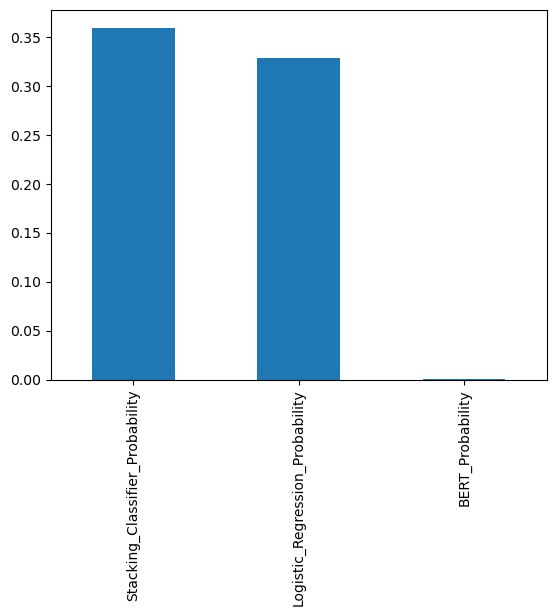

In [85]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

results_df.mean().plot(kind='bar')

root = tk.Tk()
root.title("Anxiety Probability Analysis")

fig = Figure(figsize=(5, 4), dpi=100)
ax = fig.add_subplot(111)
results_df.mean().plot(kind='bar', ax=ax)
ax.set_title('Average Probability of Anxiety by Model')
ax.set_ylabel('Probability')
ax.set_xlabel('Models')

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

explanatory_text = """
Based on the survey responses, the models have estimated a certain likelihood of anxiety. The Stacking Classifier, with its ensemble approach, offers a comprehensive probability by considering various features like 'X', 'Y', and 'Z'. The Logistic Regression model, which is more straightforward, focuses on features like 'A', 'B', and 'C'. These predictions help in understanding the potential factors contributing to anxiety but should be interpreted with caution and professional consultation.
"""
text_widget = tk.Text(root, height=12)
text_widget.insert(tk.END, explanatory_text)
text_widget.pack()

root.mainloop()